In [1]:
! pip install -q kaggle

In [2]:
#!pip install --upgrade --force-reinstall --no-deps kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kamrannaseer","key":"86bfee909777b6a9a32c48d76ca589d5"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 95% 427M/450M [00:01<00:00, 264MB/s]
100% 450M/450M [00:01<00:00, 246MB/s]


In [10]:
!mkdir Flowers\ Recognition

In [8]:
!mkdir flowers

In [12]:
!unzip /content/flowers-recognition.zip -d /content/Flowers\ Recognition/flowers

Streaming output truncated to the last 5000 lines.
  inflating: /content/Flowers Recognition/flowers/flowers/flowers/rose/110472418_87b6a3aa98_m.jpg  
  inflating: /content/Flowers Recognition/flowers/flowers/flowers/rose/11102341464_508d558dfc_n.jpg  
  inflating: /content/Flowers Recognition/flowers/flowers/flowers/rose/11233672494_d8bf0a3dbf_n.jpg  
  inflating: /content/Flowers Recognition/flowers/flowers/flowers/rose/11694025703_9a906fedc1_n.jpg  
  inflating: /content/Flowers Recognition/flowers/flowers/flowers/rose/118974357_0faa23cce9_n.jpg  
  inflating: /content/Flowers Recognition/flowers/flowers/flowers/rose/11944957684_2cc806276e.jpg  
  inflating: /content/Flowers Recognition/flowers/flowers/flowers/rose/12165480946_c4a3fe182d_n.jpg  
  inflating: /content/Flowers Recognition/flowers/flowers/flowers/rose/12202373204_34fb07205b.jpg  
  inflating: /content/Flowers Recognition/flowers/flowers/flowers/rose/12238827553_cf427bfd51_n.jpg  
  inflating: /content/Flowers Recogniti

In [13]:
import os
print(os.listdir('/content/Flowers Recognition/flowers/flowers'))

['daisy', 'rose', 'sunflower', 'flowers', 'dandelion', 'tulip']


# Importing Various Modules

In [14]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 

In [15]:
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [16]:
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

In [17]:
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

# Preparing the Data

In [23]:
X=[]  # /content/Flowers Recognition/flowers/flowers
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/Flowers Recognition/flowers/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/Flowers Recognition/flowers/flowers/sunflower'
FLOWER_TULIP_DIR='/content/Flowers Recognition/flowers/flowers/tulip'
FLOWER_DANDI_DIR='/content/Flowers Recognition/flowers/flowers/dandelion'
FLOWER_ROSE_DIR='/content/Flowers Recognition/flowers/flowers/rose'

In [24]:
def assign_label(img,flower_type):
    return flower_type
    

In [25]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        
        
 

In [26]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 769/769 [00:01<00:00, 511.36it/s]

769


In [27]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 734/734 [00:01<00:00, 405.42it/s]

1503


In [28]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:02<00:00, 460.44it/s]

2487


In [29]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

 94%|█████████▎| 988/1055 [00:02<00:00, 473.36it/s]


error: ignored

In [30]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:01<00:00, 501.69it/s]

4264


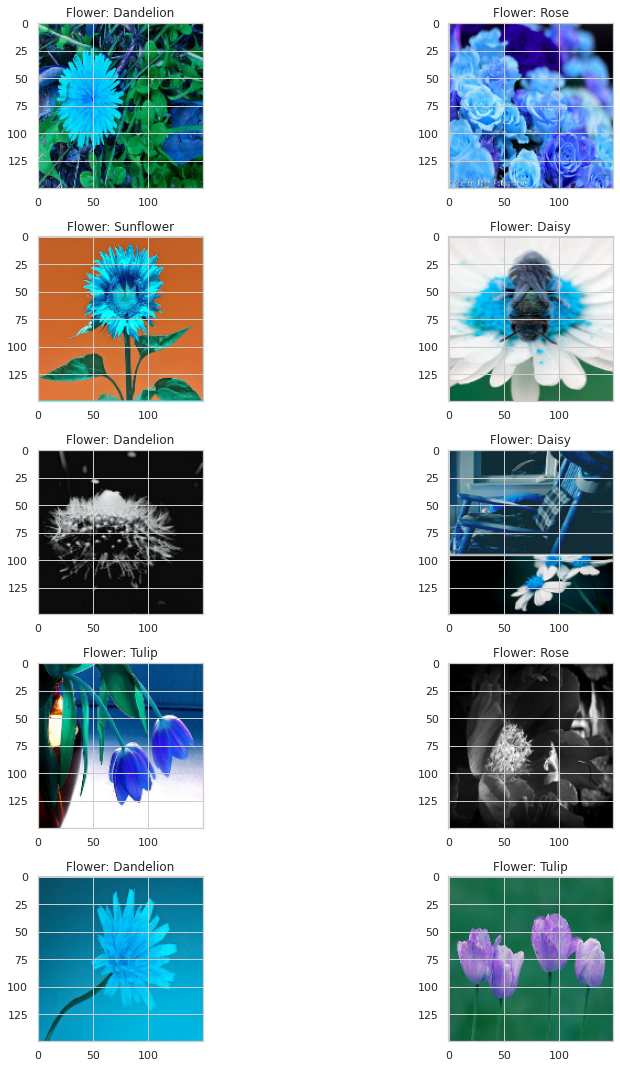

In [31]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [32]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [36]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

# Modelling

In [37]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [38]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [39]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [40]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        8

In [42]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
24/24 [==============================] - 22s 614ms/step - loss: 1.5482 - accuracy: 0.2881 - val_loss: 1.2629 - val_accuracy: 0.4390
Epoch 2/50
24/24 [==============================] - 14s 587ms/step - loss: 1.1966 - accuracy: 0.4839 - val_loss: 1.1142 - val_accuracy: 0.5600
Epoch 3/50
24/24 [==============================] - 14s 590ms/step - loss: 1.0520 - accuracy: 0.5824 - val_loss: 1.0409 - val_accuracy: 0.5741
Epoch 4/50
24/24 [==============================] - 14s 588ms/step - loss: 1.0202 - accuracy: 0.6042 - val_loss: 0.9578 - val_accuracy: 0.6426
Epoch 5/50
24/24 [==============================] - 14s 589ms/step - loss: 0.9110 - accuracy: 0.6479 - val_loss: 0.9383 - val_accuracy: 0.6126
Epoch 6/50
24/24 [==============================] - 14s 585ms/step - loss: 0.9392 - accuracy: 0.6303 - val_loss: 0.8817 - val_accuracy: 0.6576
Epoch 7/50
24/24 [==============================] - 14s 588ms/step - loss: 0.8438 - accuracy: 0.6574 - val_loss: 0.8479 - val_accuracy: 0.6782

# Evaluating the Model Performance

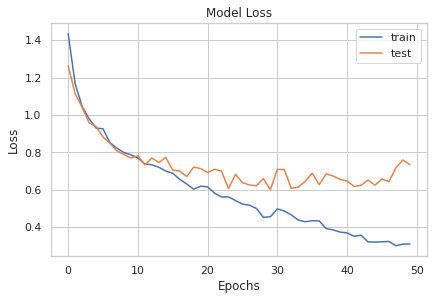

In [43]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

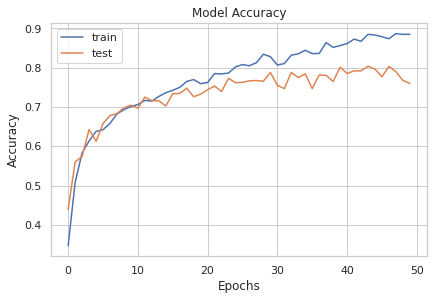

In [45]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# Visualizing Predictons on the Validation Set

In [46]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [47]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

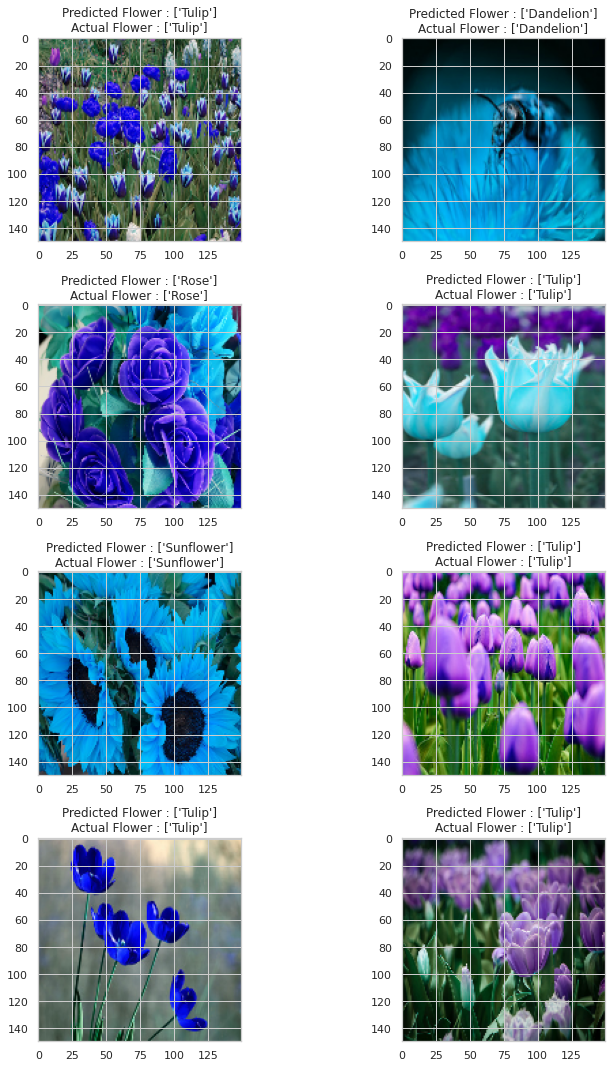

In [56]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[prop_class[count]]], axis=1))))
        plt.tight_layout()
        count+=1

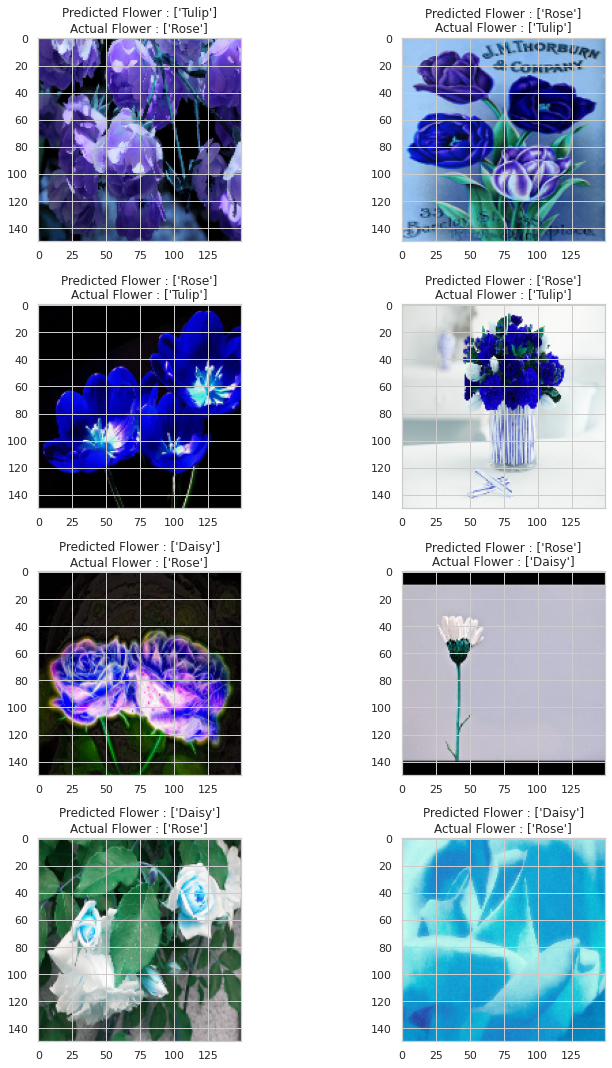

In [57]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[mis_class[count]]], axis=1))))
        plt.tight_layout()
        count+=1

In [58]:
model.save("flower_predicter.h5")